In [131]:
from nilearn import datasets
from nilearn.connectome import ConnectivityMeasure
from nilearn import plotting
from scipy import stats
import pandas as pd
import numpy as np
import os

Below is the cell you want to adapt with you own data.
The data we used here were part of the autism challenge (https://github.com/neuroanatomy/autism-challenge/tree/master) and have been downloaded using the script download_data.py

In [132]:
fmri_dir = "/Users/eli/Documents/data/fmri/msdl/"
list_files = os.listdir(fmri_dir)
list_files.remove('.DS_Store')

files = [fmri_dir + f + '/run_1/' + f + '_task-Rest_confounds.csv' for f in list_files]

time_series = [pd.read_csv(file, header=None) for file in files]
time_series_array = [pd.DataFrame(series).to_numpy() for series in time_series]

We are using the MSDL atlas here, feel free to adapt to your needs.

In [133]:
atlas = datasets.fetch_atlas_msdl()
atlas_filename = atlas["maps"]
labels = atlas ["labels"]

In [134]:
correlation_measure = ConnectivityMeasure(
    kind="tangent",
    standardize="zscore_sample",
)
correlation_matrices = correlation_measure.fit_transform(time_series_array)

In [135]:
s, n, _ = correlation_matrices.shape
average_correlations = [[0 for _ in range(n)] for _ in range(n)]

for mat in correlation_matrices:
    for i, line in enumerate(mat):
        for j, correl in enumerate(line):
            average_correlations[i][j] += correl / s

Below is the plot of the average correlation matrix between the regions, nicely highlighting the default mode network.

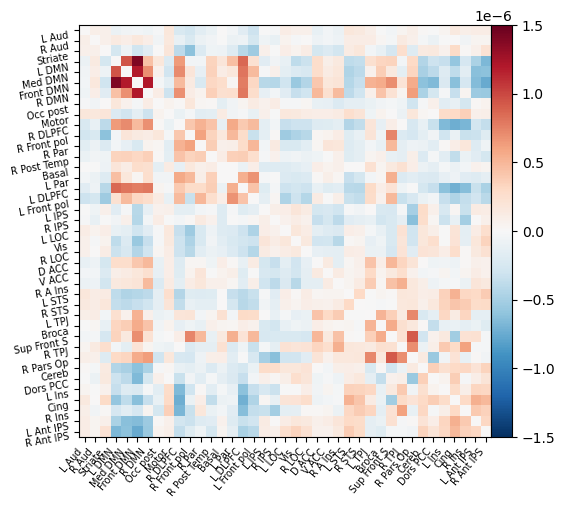

In [136]:
correlation_matrix = np.array([np.array(line) for line in average_correlations])

# Mask out the major diagonal
np.fill_diagonal(correlation_matrix, 0)
plotting.plot_matrix(
    correlation_matrix, labels=labels, colorbar=True, vmax=1.5e-6, vmin=-1.5e-6
)

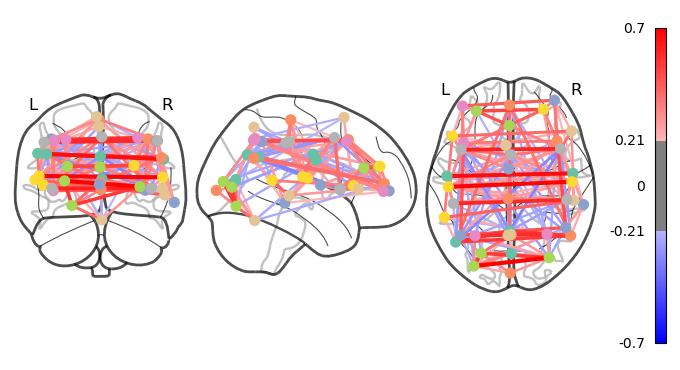

In [76]:
coords = atlas.region_coords

# We threshold to keep only the 20% of edges with the highest value
# because the graph is very dense
plotting.plot_connectome(
    correlation_matrix, coords, edge_threshold="80%", colorbar=True
)

plotting.show()